## Simple linear regression model using **scikit-learn**

We start with perhaps our simplest possible example, using **Scikit-Learn** to perform linear regression analysis on a data set produced by us. 

What follows is a simple Python code where we have defined a function
$y$ in terms of the variable $x$. Both are defined as vectors with  $100$ entries. 
The numbers in the vector $\hat{x}$ are given
by random numbers generated with a uniform distribution with entries
$x_i \in [0,1]$ (more about probability distribution functions
later). These values are then used to define a function $y(x)$
(tabulated again as a vector) with a linear dependence on $x$ plus a
random noise added via the normal distribution.


The Numpy functions are imported used the **import numpy as np**
statement and the random number generator for the uniform distribution
is called using the function **np.random.rand()**, where we specificy
that we want $100$ random variables.  Using Numpy we define
automatically an array with the specified number of elements, $100$ in
our case.  With the Numpy function **randn()** we can compute random
numbers with the normal distribution (mean value $\mu$ equal to zero and
variance $\sigma^2$ set to one) and produce the values of $y$ assuming a linear
dependence as function of $x$

$$
y = 2x+N(0,1),
$$

where $N(0,1)$ represents random numbers generated by the normal
distribution.  From **Scikit-Learn** we import then the
**LinearRegression** functionality and make a prediction $\tilde{y} =
\alpha + \beta x$ using the function **fit(x,y)**. We call the set of
data $(\hat{x},\hat{y})$ for our training data. The Python package
**scikit-learn** has also a functionality which extracts the above
fitting parameters $\alpha$ and $\beta$ (see below). Later we will
distinguish between training data and test data.

For plotting we use the Python package
[matplotlib](https://matplotlib.org/) which produces publication
quality figures. Feel free to explore the extensive
[gallery](https://matplotlib.org/gallery/index.html) of examples. In
this example we plot our original values of $x$ and $y$ as well as the
prediction **ypredict** ($\tilde{y}$), which attempts at fitting our
data with a straight line.

The Python code follows here.

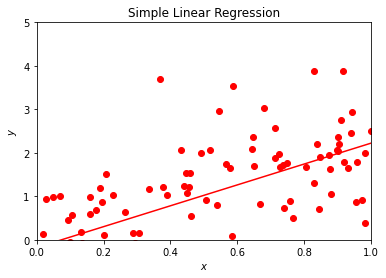

In [1]:
%matplotlib inline

# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 2*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[1]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()

This example serves several aims. It allows us to demonstrate several
aspects of data analysis and later machine learning algorithms. The
immediate visualization shows that our linear fit is not
impressive. It goes through the data points, but there are many
outliers which are not reproduced by our linear regression.  We could
now play around with this small program and change for example the
factor in front of $x$ and the normal distribution.  Try to change the
function $y$ to

$$
y = 10x+0.01 \times N(0,1),
$$

where $x$ is defined as before.  Does the fit look better? Indeed, by
reducing the role of the noise given by the normal distribution we see immediately that
our linear prediction seemingly reproduces better the training
set. However, this testing 'by the eye' is obviouly not satisfactory in the
long run. Here we have only defined the training data and our model, and 
have not discussed a more rigorous approach to the **cost** function.

We need more rigorous criteria in defining whether we have succeeded or
not in modeling our training data.  You will be surprised to see that
many scientists seldomly venture beyond this 'by the eye' approach. A
standard approach for the *cost* function is the so-called $\chi^2$
function (a variant of the mean-squared error (MSE))

$$
\chi^2 = \frac{1}{n}
\sum_{i=0}^{n-1}\frac{(y_i-\tilde{y}_i)^2}{\sigma_i^2},
$$

where $\sigma_i^2$ is the variance (to be defined later) of the entry
$y_i$.  We may not know the explicit value of $\sigma_i^2$, it serves
however the aim of scaling the equations and make the cost function
dimensionless.  

Minimizing the cost function is a central aspect of
our discussions to come. Finding its minima as function of the model
parameters ($\alpha$ and $\beta$ in our case) will be a recurring
theme in these series of lectures. Essentially all machine learning
algorithms we will discuss center around the minimization of the
chosen cost function. This depends in turn on our specific
model for describing the data, a typical situation in supervised
learning. Automatizing the search for the minima of the cost function is a
central ingredient in all algorithms. Typical methods which are
employed are various variants of **gradient** methods. These will be
discussed in more detail later. Again, you'll be surprised to hear that
many practitioners minimize the above function ''by the eye', popularly dubbed as 
'chi by the eye'. That is, change a parameter and see (visually and numerically) that 
the  $\chi^2$ function becomes smaller. 

There are many ways to define the cost function. A simpler approach is to look at the relative difference between the training data and the predicted data, that is we define 
the relative error (why would we prefer the MSE instead of the relative error?) as

$$
\epsilon_{\mathrm{relative}}= \frac{\vert \hat{y} -\hat{\tilde{y}}\vert}{\vert \hat{y}\vert}.
$$

The squared cost function results in an arithmetic mean-unbiased
estimator, and the absolute-value cost function results in a
median-unbiased estimator (in the one-dimensional case, and a
geometric median-unbiased estimator for the multi-dimensional
case). The squared cost function has the disadvantage that it has the tendency
to be dominated by outliers.

We can modify easily the above Python code and plot the relative error instead

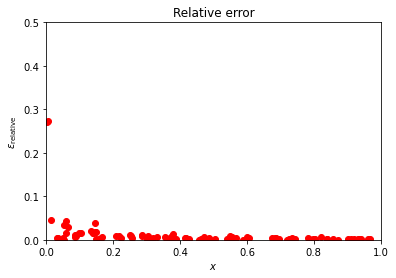

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 5*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)

plt.plot(x, np.abs(ypredict-y)/abs(y), "ro")
plt.axis([0,1.0,0.0, 0.5])
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{relative}}$')
plt.title(r'Relative error')
plt.show()

Depending on the parameter in front of the normal distribution, we may
have a small or larger relative error. Try to play around with
different training data sets and study (graphically) the value of the
relative error.

As mentioned above, **Scikit-Learn** has an impressive functionality.
We can for example extract the values of $\alpha$ and $\beta$ and
their error estimates, or the variance and standard deviation and many
other properties from the statistical data analysis. 

Here we show an
example of the functionality of **Scikit-Learn**.

The intercept alpha: 
 [2.13187387]
Coefficient beta : 
 [[4.93654021]]
Mean squared error: 0.29
Variance score: 0.88
Mean squared log error: 0.01
Mean absolute error: 0.44


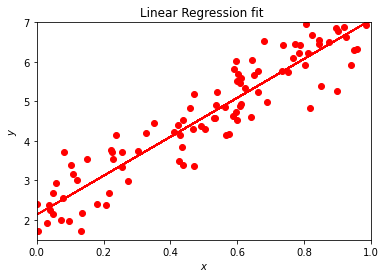

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

x = np.random.rand(100,1)
y = 2.0+ 5*x+0.5*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, ypredict))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, ypredict) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, ypredict))
plt.plot(x, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

The function **coef** gives us the parameter $\beta$ of our fit while **intercept** yields 
$\alpha$. Depending on the constant in front of the normal distribution, we get values near or far from $alpha =2$ and $\beta =5$. Try to play around with different parameters in front of the normal distribution. The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

The smaller the value, the better the fit. Ideally we would like to
have an MSE equal zero.  The attentive reader has probably recognized
this function as being similar to the $\chi^2$ function defined above.

The **r2score** function computes $R^2$, the coefficient of
determination. It provides a measure of how well future samples are
likely to be predicted by the model. Best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of $\hat{y}$,
disregarding the input features, would get a $R^2$ score of $0.0$.

If $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Another quantity taht we will meet again in our discussions of regression analysis is 
 the mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss or what we call the $l1$-norm loss. In our discussion above we presented the relative error.
The MAE is defined as follows

$$
\text{MAE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$

We present the 
squared logarithmic (quadratic) error

$$
\text{MSLE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$

where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 



We conclude this part with another example. Instead of 
a linear $x$-dependence we study now a cubic polynomial and use the polynomial regression analysis tools of scikit-learn.

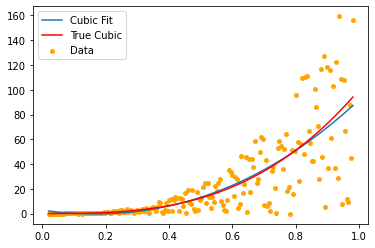

0.005


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

x=np.linspace(0.02,0.98,200)
noise = np.asarray(random.sample((range(200)),200))
y=x**3*noise
yn=x**3*100
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
plt.plot(x,yn, color='red', label="True Cubic")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

## The Boston housing data example

The Boston housing  
data set was originally a part of UCI Machine Learning Repository
and has been removed now. The data set is now included in **Scikit-Learn**'s 
library.  There are 506 samples and 13 feature (predictor) variables
in this data set. The objective is to predict the value of prices of
the house using the features (predictors) listed here.

The features/predictors are
1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25000 square feet

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. TAX: Full-value property tax rate per USD10000

11. B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town

12. LSTAT: Percentage of lower status of the population

13. MEDV: Median value of owner-occupied homes in USD 1000s

We start by importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

and load the Boston Housing DataSet from **Scikit-Learn**

In [6]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Then we invoke Pandas

In [7]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

and preprocess the data

In [8]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We can then visualize the data

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


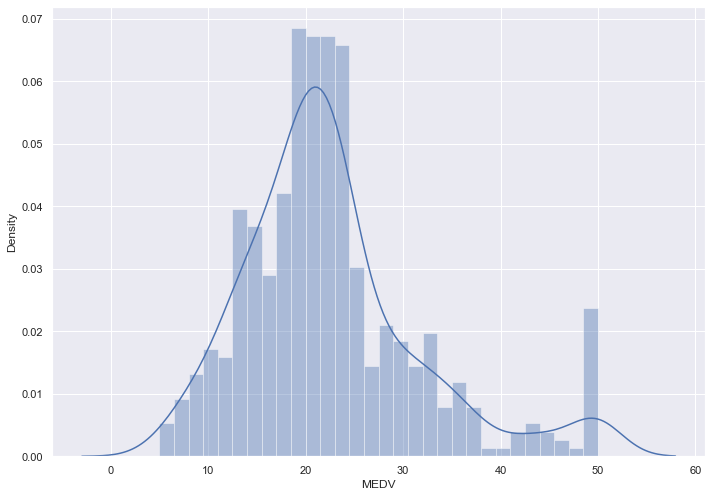

In [9]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

It is now useful to look at the correlation matrix

<AxesSubplot:>

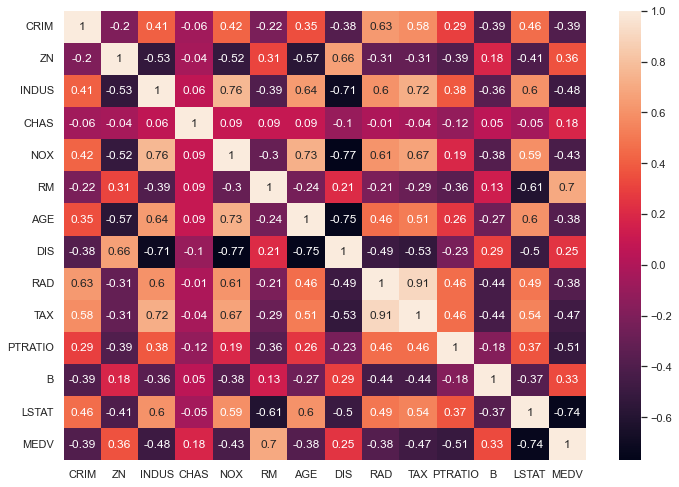

In [10]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT** and  **RM**. We see also that **RAD** and **TAX** are stronly correlated, but we don't include this in our features together to avoid multi-colinearity

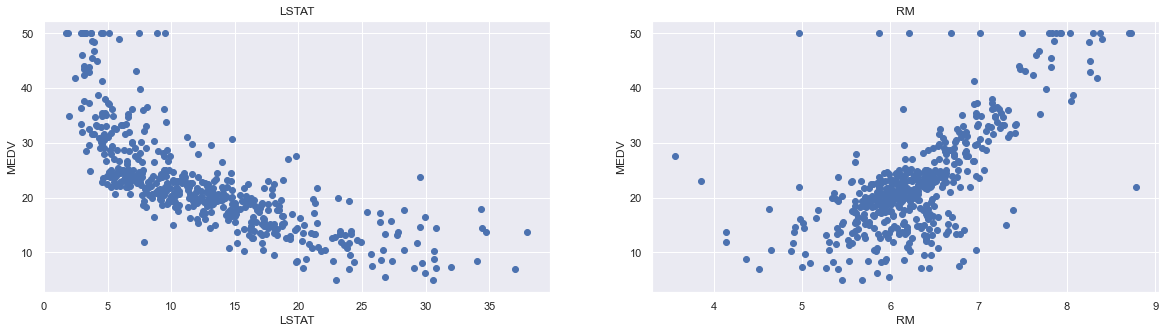

In [11]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Now we start training our model

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We split the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Then we use the linear regression functionality from **Scikit-Learn**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


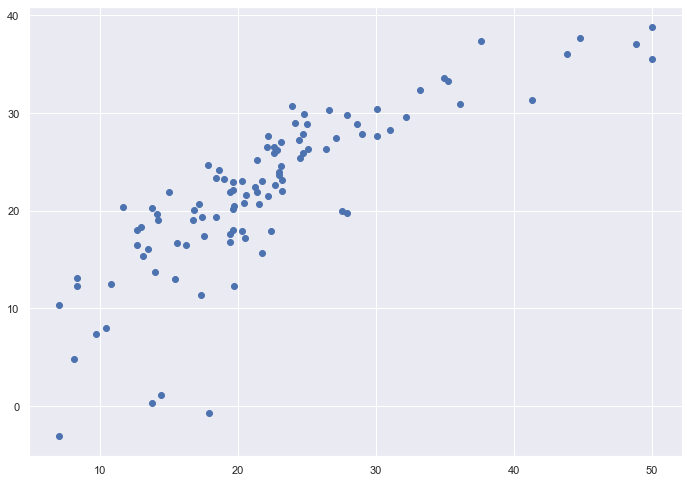

In [15]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

Many Machine Learning problems involve thousands or even millions of
features for each training instance. Not only does this make training
extremely slow, it can also make it much harder to find a good
solution, as we will see. This problem is often referred to as the
curse of dimensionality.  Fortunately, in real-world problems, it is
often possible to reduce the number of features considerably, turning
an intractable problem into a tractable one.

Later  we will discuss some of the most popular dimensionality reduction
techniques: the principal component analysis (PCA), Kernel PCA, and
Locally Linear Embedding (LLE).  


Principal component analysis and its various variants deal with the
problem of fitting a low-dimensional [affine
subspace](https://en.wikipedia.org/wiki/Affine_space) to a set of of
data points in a high-dimensional space. With its family of methods it
is one of the most used tools in data modeling, compression and
visualization.


Before we proceed however, we will discuss how to preprocess our
data. Till now and in connection with our previous examples we have
not met so many cases where we are too sensitive to the scaling of our
data. Normally the data may need a rescaling and/or may be sensitive
to extreme values. Scaling the data renders our inputs much more
suitable for the algorithms we want to employ.

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The


The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.